In [1]:
import numpy as np
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt
import matplotlib.colors as mclr

In [2]:
# https://alpynepyano.github.io/healthyNumerics/posts/fractal-mountains-with-python.html

In [5]:
def scale(a): return (a-np.min(a))/(np.max(a)-np.min(a))

def generate_data(NT):
    t0 = np.linspace(0,1,NT)
    t1 = t0 * 2 * np.pi
    t2 = np.pi*np.arange(NT)/2
    y = np.sin(t1)
    return t1,y

def prolong1D(xa,za,nt):
    [nxa] = xa.shape

    nxb = nxa + (nxa-1)
    xb = np.zeros(nxb); zb = np.zeros(nxb)

    jx = slice(0,nxb,2);
    xb[jx] = xa;  zb[jx] = za

    jx  = slice(1,nxb,2)
    jxm = slice(0,nxb,2); jxp = slice(2,nxb,2)
    ixm = slice(0,nxa-1); ixp = slice(1,nxa  )

    H = (1-nt)**(NT/3.3)

    xb[jx] = 0.5*(xa[ixm]+xa[ixp])
    zb[jx] = 0.5*(za[ixm]+za[ixp]) + (np.random.randn(zb[jx].shape[0])-0.0)*H

    return xb,zb

def fractalize(NT=9):
    x,z = generate_data(2)
    for nt in np.arange(NT):
        x,z = prolong1D(x,z,nt/NT)
    return x,z

def plot_fractals(NL,x,Y):
    fig, (ax0) = plt.subplots(1, 1, figsize=(25,5));
    z_min = np.min(Y) ; z_max  = np.max(Y)*1.2
    x_min = np.min(x);  x_max = np.max(x)
    plt.fill_between(x,z_min,z_max, color='grey',zorder=0,alpha=0.2)

    for nl in np.arange(NL):
        ax0.fill_between(x,Y[nl],z_min,cmap='plasma', zorder=nl+1, alpha=0.5)

    plt.axis('off'); plt.show()
    #pic_name='fractalmountain_B_2d_13.png'
    #fig.savefig(pic_name, transparency=True)

def run(NL,NT):
    x,z = fractalize(NT)
    nz = z.shape[0]
    Y = np.zeros((NL,nz))
    for nl in np.arange(NL):
        x,z = fractalize(NT)
        x = scale(x)
        z = scale(z)
        Y[nl] = scale(z) * (1 - 0.2*nl)
    return x,Y

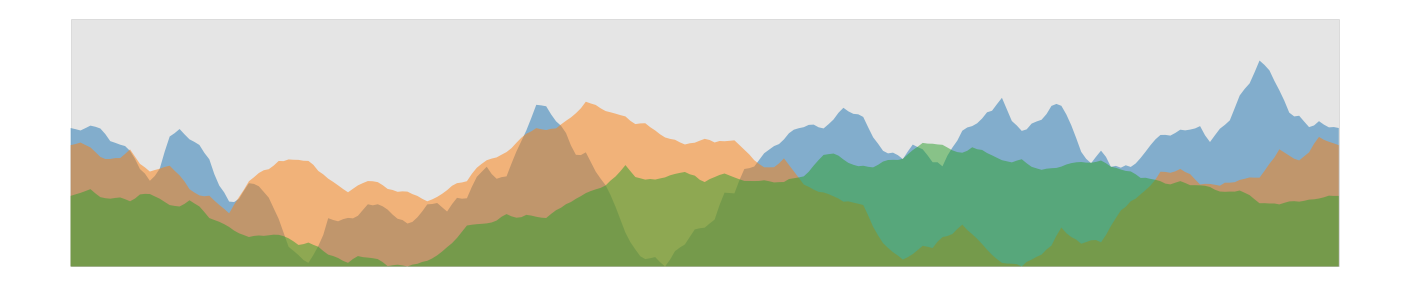

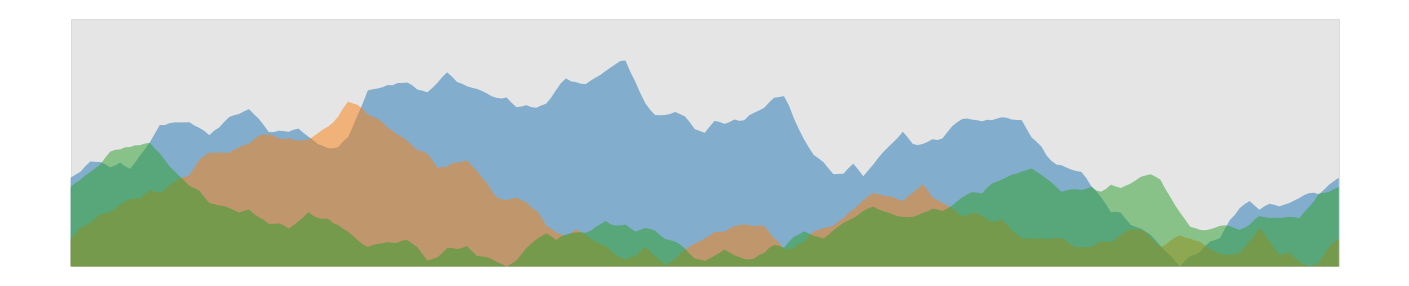

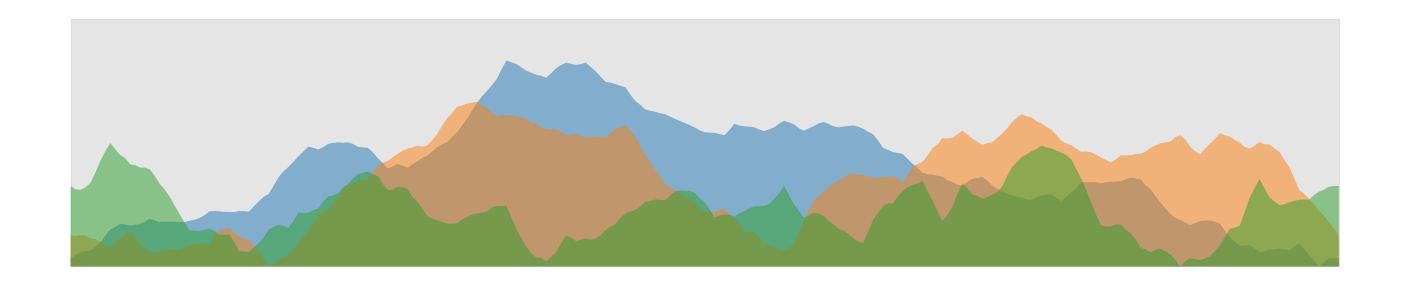

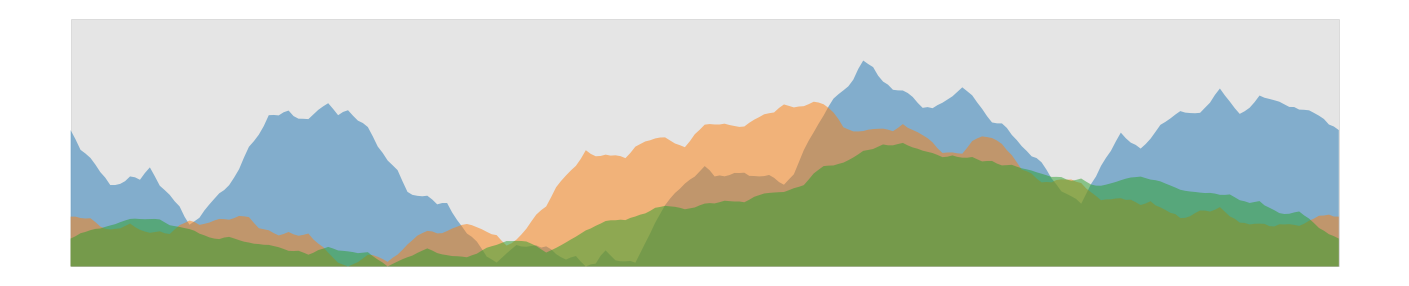

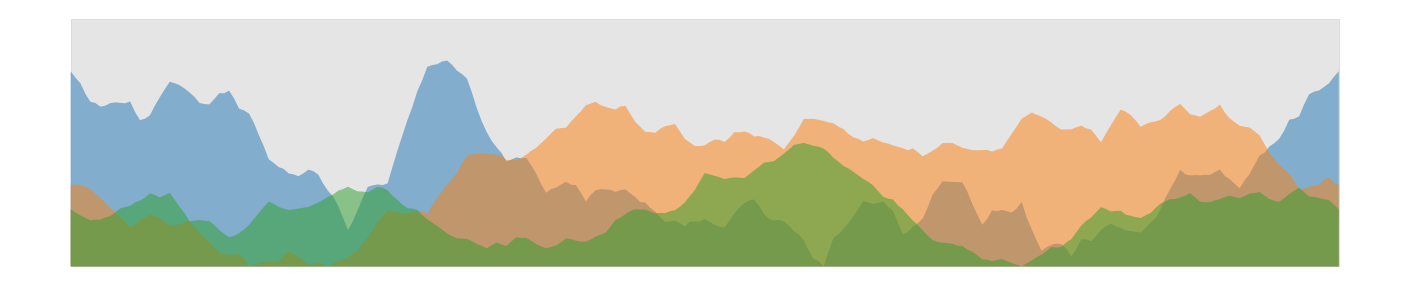

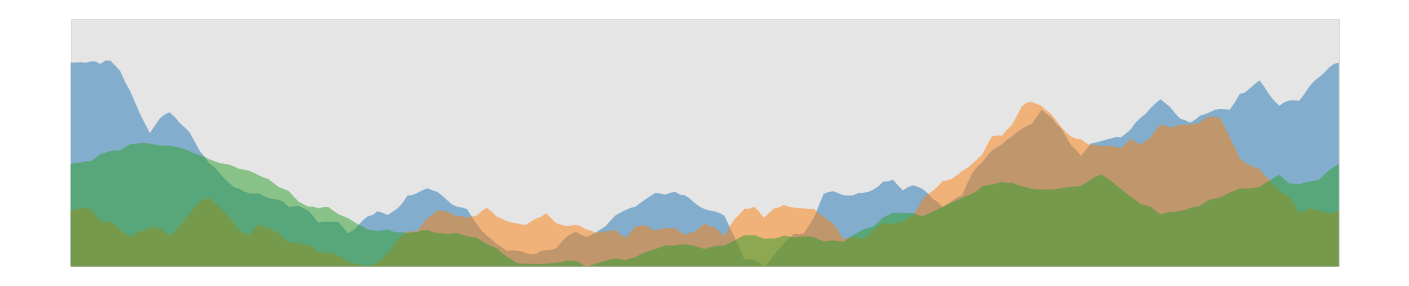

In [6]:
NL = 3  # number of lines
NT = 8  # number of refinement

for k in range(6):
    x,Y = run(NL,NT)
    plot_fractals(NL,x,Y)
